In [28]:
import pandas as pd
import csv
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [29]:
buy_behavior = pd.read_csv('buy_behavior_log.csv')

buy_behavior.head(5)

,user,time_stamp,btag,cate,brand
0,916958,1493811673,buy,123,97176
1,916958,1493811809,buy,123,97176
2,628854,1493781424,buy,4262,370203
3,623496,1493810730,buy,4262,370203
4,1099015,1493774927,buy,9390,347564


In [30]:
user_profile = pd.read_csv('user_profile.csv')

user_profile.head(5)

,userid,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,234,0,5,2,5,NaN,3,0,3.0
1,523,5,2,2,2,1.0,3,1,2.0
2,612,0,8,1,2,2.0,3,0,NaN
3,1670,0,4,2,4,NaN,1,0,NaN
4,2545,0,10,1,4,NaN,3,0,NaN


255


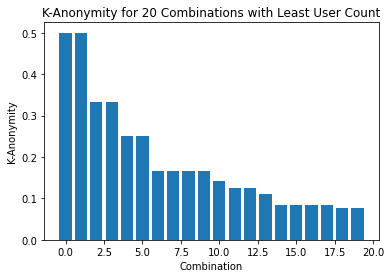

In [31]:
###### Identification attack user_groups ######

user_features = user_profile[['cms_segid', 'cms_group_id', 'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level ']]

# Drop rows with missing values
user_features = user_features.dropna()

# Get all possible combinations of the user features
combinations = []
for i in range(1, len(user_features.columns)+1):
    combinations += list(itertools.combinations(user_features.columns, i))
    
print(len(combinations))

combinations_count = {}
for combination in combinations:
    combination_count = len(user_features.groupby(list(combination)).size())
    combinations_count[combination] = combination_count

# Create a list of tuples from the dictionary items
counts_list = list(combinations_count.items())

# Sort the list by the count of users in ascending order
counts_list.sort(key=lambda x: x[1])

# Get the top 20 combinations with the least count
top_combinations = counts_list[:20]

# Create a list of the K-anonymity values for each combination
k_anonimity = [1/count[1] for count in top_combinations]

# Plot the K-anonymity values as a bar chart
plt.bar(range(len(k_anonimity)), k_anonimity)

# Add labels to the x and y axis and add a title to the plot
plt.xlabel('Combination')
plt.ylabel('K-Anonymity')
plt.title('K-Anonymity for 20 Combinations with Least User Count')

# Show the plot
plt.show()

In [32]:
top_brands = [12869,
            14983,
            18593,
            18595,
            22641,
            36241,
            38543,
            39211,
            49257,
            78538,
            83456,
            88078,
            90282,
            93068,
            93403,
            95766,
            98931,
            116234,
           116349,
            124290,
           129994,
            132353,
           143597,
            146115,
           156936,
            160582,
           168008,
            184921,
           186516,
            188059,
           188080,
            195240,
           207245,
            222087,
           224985,
            234846,
           235358,
            236225,
           247789,
            249158,
           252916,
            269810,
           273201,
            282953,
           293023,
            303910,
           331997,
            336520,
           340073,
            342533,
           342760,
            353787,
           361993,
            370203,
           372532,
            387520,
           388700,
            389719,
           390518,
            392793,
           400399,
            406901,
           425589,
            437724,
           454237,
            370203,
            388700]

top_brands_data = buy_behavior[buy_behavior['brand'].isin(top_brands)]
print(top_brands_data)


           user  time_stamp btag  cate   brand
2        628854  1493781424  buy  4262  370203
3        623496  1493810730  buy  4262  370203
8        226966  1493795964  buy  1846  184921
10       230906  1493765547  buy  4263  388700
11       478116  1493764032  buy  4263  388700
...         ...         ...  ...   ...     ...
9115894   34394  1493490084  buy  6261  454237
9115895   34809  1493515127  buy  4280  143597
9115896  637845  1493543001  buy  4280  143597
9115904  917535  1493561528  buy  4520  454237
9115915  564686  1493544321  buy  6806  247789

[1786969 rows x 5 columns]


In [33]:
# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(buy_behavior, user_profile, left_on='user', right_on='userid')
print(merged_df)

# Group the merged dataframe by the 'brand' and 'final_gender_code' columns and get the count of each group
grouped_df = merged_df.groupby(['brand', 'final_gender_code'], as_index=False).count()[['brand', 'final_gender_code', 'user']]
print(grouped_df)

# Pivot the grouped dataframe to create a pivot table with the 'brand' column as the index, the 'final_gender_code' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

           user  time_stamp btag  cate   brand  userid  cms_segid  \
0        916958  1493811673  buy   123   97176  916958         33   
1        916958  1493811809  buy   123   97176  916958         33   
2        916958  1494055722  buy  4267  178847  916958         33   
3        916958  1494037918  buy   123   97176  916958         33   
4        916958  1493811673  buy   123   97176  916958         33   
...         ...         ...  ...   ...     ...     ...        ...   
8825410  319183  1493526092  buy  2505  412044  319183         92   
8825411  889393  1493567745  buy  6181  264201  889393         60   
8825412  401828  1493532067  buy  1892  398556  401828          0   
8825413  614980  1493525415  buy  8998  224985  614980          0   
8825414  614980  1493525641  buy  8998  224985  614980          0   

         cms_group_id  final_gender_code  age_level  pvalue_level  \
0                   4                  2          4           2.0   
1                   4            

In [34]:
# Pivot the grouped dataframe to create a pivot table with the 'final_gender_code' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='final_gender_code', values='user')

# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)
percent_table = percent_table.round(2)
print(percent_table)

# Find ambiguity value by subtracting max frequency from 100 in each row
ambiguity_values = 100 - percent_table.max(axis=1)

# Create new dataframe with brand and ambiguity value
ambiguity_table = pd.DataFrame({'brand': percent_table.index, 'ambiguity': ambiguity_values.round(2)}).reset_index(drop=True)

# Display the new dataframe
print(ambiguity_table)

amb_dict = dict(ambiguity_table['ambiguity'].value_counts())

# Sort the dictionary items by their keys
ambiguity_dict_gender = dict(sorted(amb_dict.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict_gender)



final_gender_code       1       2
brand                            
2                   36.16   63.84
3                   37.14   62.86
6                    0.00  100.00
7                   51.63   48.37
8                   25.00   75.00
...                   ...     ...
461430             100.00    0.00
461447               0.00  100.00
461453               0.00  100.00
461457               0.00  100.00
461526               0.00  100.00

[204324 rows x 2 columns]
         brand  ambiguity
0            2      36.16
1            3      37.14
2            6       0.00
3            7      48.37
4            8      25.00
...        ...        ...
204319  461430       0.00
204320  461447       0.00
204321  461453       0.00
204322  461457       0.00
204323  461526       0.00

[204324 rows x 2 columns]
{0.0: 93524, 0.36: 1, 0.51: 1, 0.57: 1, 0.62: 1, 0.68: 1, 0.79: 1, 0.8: 1, 0.82: 1, 0.83: 1, 0.84: 1, 0.85: 1, 0.88: 1, 0.9: 1, 0.95: 1, 0.97: 1, 0.98: 1, 0.99: 1, 1.03: 1, 1.14: 1, 1.15: 1, 1

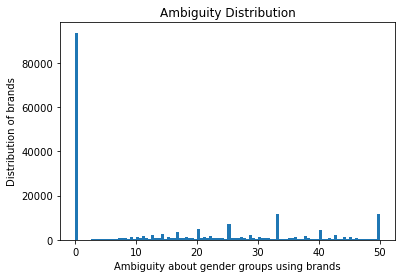

In [35]:
# `ambiguity_dict_age` is the sorted dictionary
x_values = list(ambiguity_dict_gender.keys())
y_values = list(ambiguity_dict_gender.values())

# Create a histogram with 10 bins
plt.hist(x_values, bins=100, weights=y_values)

# Add axis labels and a title
plt.xlabel('Ambiguity about gender groups using brands')
plt.ylabel('Distribution of brands')
plt.title('Ambiguity Distribution')

# Show the plot
plt.show()

In [36]:
# Merge the top_5_buy_behavior and user_profile dataframes on the 'userid' column
merged_df = pd.merge(buy_behavior, user_profile, left_on='user', right_on='userid')


# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = merged_df.groupby(['age_level', 'brand'], as_index=False).count()[['age_level', 'brand', 'user']]


# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='age_level', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)


age_level    0     1     2     3     4     5     6
brand                                             
2          0.0   8.0  31.0  54.0  60.0  21.0   3.0
3          0.0   1.0   5.0  12.0   9.0   7.0   1.0
6          0.0   0.0   0.0   1.0   0.0   0.0   0.0
7          0.0  46.0  87.0  85.0  97.0  74.0  10.0
8          0.0  33.0  61.0  16.0   0.0  45.0   9.0
...        ...   ...   ...   ...   ...   ...   ...
461430     0.0   0.0   0.0   0.0   0.0   1.0   0.0
461447     0.0   0.0   0.0   0.0   1.0   0.0   0.0
461453     0.0   0.0   0.0   1.0   0.0   0.0   1.0
461457     0.0   0.0   1.0   0.0   0.0   0.0   0.0
461526     0.0   0.0   0.0   0.0   0.0   1.0   0.0

[204324 rows x 7 columns]


In [37]:
# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand', columns='age_level', values='user')

# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)
percent_table = percent_table.round(2)
print(percent_table)

# Find ambiguity value by subtracting max frequency from 100 in each row
ambiguity_values = 100 - percent_table.max(axis=1)

# Create new dataframe with brand and ambiguity value
ambiguity_table = pd.DataFrame({'brand': percent_table.index, 'ambiguity': ambiguity_values.round(2)}).reset_index(drop=True)

# Display the new dataframe
print(ambiguity_table)

amb_dict = dict(ambiguity_table['ambiguity'].value_counts())

# Sort the dictionary items by their keys
ambiguity_dict_age = dict(sorted(amb_dict.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict_age)



age_level    0      1       2       3       4       5      6
brand                                                       
2          0.0   4.52   17.51   30.51   33.90   11.86   1.69
3          0.0   2.86   14.29   34.29   25.71   20.00   2.86
6          0.0   0.00    0.00  100.00    0.00    0.00   0.00
7          0.0  11.53   21.80   21.30   24.31   18.55   2.51
8          0.0  20.12   37.20    9.76    0.00   27.44   5.49
...        ...    ...     ...     ...     ...     ...    ...
461430     0.0   0.00    0.00    0.00    0.00  100.00   0.00
461447     0.0   0.00    0.00    0.00  100.00    0.00   0.00
461453     0.0   0.00    0.00   50.00    0.00    0.00  50.00
461457     0.0   0.00  100.00    0.00    0.00    0.00   0.00
461526     0.0   0.00    0.00    0.00    0.00  100.00   0.00

[204324 rows x 7 columns]
         brand  ambiguity
0            2      66.10
1            3      65.71
2            6       0.00
3            7      75.69
4            8      62.80
...        ...        ..

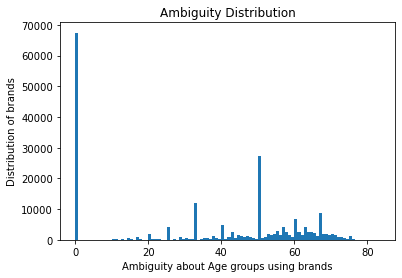

In [38]:
# `ambiguity_dict_age` is the sorted dictionary
x_values = list(ambiguity_dict_age.keys())
y_values = list(ambiguity_dict_age.values())

# Create a histogram with 10 bins
plt.hist(x_values, bins=100, weights=y_values)

# Add axis labels and a title
plt.xlabel('Ambiguity about Age groups using brands')
plt.ylabel('Distribution of brands')
plt.title('Ambiguity Distribution')

# Show the plot
plt.show()

In [39]:
#top_brands = buy_behavior['brand'].value_counts().head(50).index.tolist()
top_brands_data = buy_behavior[buy_behavior['brand'].isin(top_brands)]

merged_data = pd.merge(top_brands_data, user_profile, left_on='user', right_on='userid')
# Drop the 'userid' column since it contains the same values as 'user'
merged_data = merged_data.drop('userid', axis=1)
print(merged_data)

brand_combinations = list(itertools.combinations(top_brands, 2))
print(brand_combinations)

           user  time_stamp btag   cate   brand  cms_segid  cms_group_id  \
0        628854  1493781424  buy   4262  370203          0             3   
1        623496  1493810730  buy   4262  370203         45             5   
2        623496  1493629233  buy   6152  252916         45             5   
3        623496  1493629233  buy   6152  252916         45             5   
4        623496  1493629233  buy   6152  252916         45             5   
...         ...         ...  ...    ...     ...        ...           ...   
1737564  810999  1493537501  buy  12266  425589         68             9   
1737565  788025  1493552195  buy  12422  370203          0             4   
1737566  717640  1493517219  buy  12422  388700          0             2   
1737567  614980  1493525415  buy   8998  224985          0             4   
1737568  614980  1493525641  buy   8998  224985          0             4   

         final_gender_code  age_level  pvalue_level  shopping_level  \
0               

In [40]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


result_df = pd.DataFrame(columns=['age_level', 'final_gender_code'])

for brand_combo in brand_combinations:
    brand1, brand2 = brand_combo
    brand_data = merged_data[(merged_data['brand']==brand1) & (merged_data['user'].isin(merged_data[merged_data['brand']==brand2]['user'].tolist()))]
    brand_data['brand2'] = brand2
    user_data = brand_data[['user','brand', 'brand2', 'age_level', 'final_gender_code']]
    result_df = result_df.append(user_data, ignore_index=True)
result_df = result_df.drop_duplicates(keep='first')

# Combine the brand and brand2 columns into a single column called "brand_combined"
result_df['brand_combined'] = result_df['brand'].fillna(0).astype(int).astype(str) + '_' + result_df['brand2'].fillna(0).astype(int).astype(str)

# Drop the original brand and brand2 columns
result_df.drop(['brand', 'brand2'], axis=1, inplace=True)
print(result_df)

        age_level final_gender_code       user brand_combined
0               3                 1  1065674.0    12869_14983
1               2                 1   338369.0    12869_14983
2               3                 1   986365.0    12869_14983
7               5                 1   190388.0    12869_14983
11              5                 2   759146.0    12869_14983
...           ...               ...        ...            ...
2366693         4                 1    99407.0  454237_388700
2366694         3                 2   126198.0  454237_388700
2366696         5                 2   297676.0  454237_388700
2366698         3                 2   115031.0  454237_388700
2366699         3                 2  1058439.0  454237_388700

[990168 rows x 4 columns]


In [41]:
# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = result_df.groupby(['final_gender_code', 'brand_combined'], as_index=False).count()[['final_gender_code', 'brand_combined', 'user']]

# Sort the dataframe by the 'user' column in descending order
grouped_df = grouped_df.sort_values('user', ascending=False)

print(grouped_df)

# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand_combined', columns='final_gender_code', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

      final_gender_code brand_combined    user
3525                  2  370203_370203  183321
1424                  1  370203_370203  103856
3617                  2  388700_388700   48180
1516                  1  388700_388700   36417
3616                  2  388700_370203   20787
...                 ...            ...     ...
665                   1   18595_222087       1
1241                  1  303910_331997       1
883                   1  222087_269810       1
1274                  1  331997_406901       1
226                   1  129994_331997       1

[4195 rows x 3 columns]
final_gender_code      1      2
brand_combined                 
116234_116349       23.0   21.0
116234_124290       22.0   21.0
116234_129994        8.0   28.0
116234_132353       41.0   40.0
116234_143597       15.0   42.0
...                  ...    ...
98931_400399        60.0   80.0
98931_406901        50.0   68.0
98931_425589       295.0  308.0
98931_437724       139.0   96.0
98931_454237        42.0  1

In [42]:
# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)
percent_table = percent_table.round(2)
print(percent_table)

# Find ambiguity value by subtracting max frequency from 100 in each row
ambiguity_values = 100 - percent_table.max(axis=1)

# Create new dataframe with brand and ambiguity value
ambiguity_table = pd.DataFrame({'brand': percent_table.index, 'ambiguity': ambiguity_values.round(2)}).reset_index(drop=True)

# Display the new dataframe
print(ambiguity_table)

amb_dict = dict(ambiguity_table['ambiguity'].value_counts())

# Sort the dictionary items by their keys
ambiguity_dict_gender = dict(sorted(amb_dict.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict_gender)

final_gender_code      1      2
brand_combined                 
116234_116349      52.27  47.73
116234_124290      51.16  48.84
116234_129994      22.22  77.78
116234_132353      50.62  49.38
116234_143597      26.32  73.68
...                  ...    ...
98931_400399       42.86  57.14
98931_406901       42.37  57.63
98931_425589       48.92  51.08
98931_437724       59.15  40.85
98931_454237       28.19  71.81

[2101 rows x 2 columns]
              brand  ambiguity
0     116234_116349      47.73
1     116234_124290      48.84
2     116234_129994      22.22
3     116234_132353      49.38
4     116234_143597      26.32
...             ...        ...
2096   98931_400399      42.86
2097   98931_406901      42.37
2098   98931_425589      48.92
2099   98931_437724      40.85
2100   98931_454237      28.19

[2101 rows x 2 columns]
{0.0: 7, 3.23: 2, 3.57: 1, 3.67: 1, 4.76: 2, 5.0: 1, 5.26: 1, 5.88: 3, 6.0: 1, 6.35: 1, 6.36: 1, 6.57: 1, 6.67: 3, 6.78: 1, 6.9: 3, 6.99: 1, 7.14: 1, 7.27: 2, 7.4

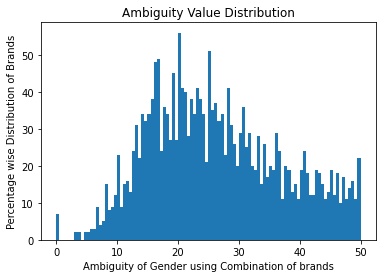

In [43]:
# `ambiguity_dict` is the sorted dictionary you created earlier
x_values = list(ambiguity_dict_gender.keys())
y_values = list(ambiguity_dict_gender.values())

# Create a histogram with 10 bins
plt.hist(x_values, bins=100, weights=y_values)

plt.xlabel('Ambiguity of Gender using Combination of brands')
plt.ylabel('Percentage wise Distribution of Brands')
plt.title('Ambiguity Value Distribution')
plt.show()

In [44]:
# Group the merged dataframe by the 'age_level' and 'brand' columns and get the count of each group
grouped_df = result_df.groupby(['age_level', 'brand_combined'], as_index=False).count()[['age_level', 'brand_combined', 'user']]
print(grouped_df)

# Pivot the grouped dataframe to create a pivot table with the 'age_level' column as the index, the 'brand' column as the columns and the 'user' column as the values
pivot_table = grouped_df.pivot(index='brand_combined', columns='age_level', values='user')
pivot_table = pivot_table.fillna(0)
print(pivot_table)

       age_level brand_combined  user
0              0  116349_361993     1
1              0  124290_129994     1
2              0  124290_143597     1
3              0  124290_168008     1
4              0  124290_188059     2
...          ...            ...   ...
11870          6   98931_400399     5
11871          6   98931_406901     5
11872          6   98931_425589    31
11873          6   98931_437724     5
11874          6   98931_454237     6

[11875 rows x 3 columns]
age_level         0     1     2      3      4      5     6
brand_combined                                            
116234_116349   0.0   1.0  15.0    7.0    7.0   13.0   1.0
116234_124290   0.0   7.0   9.0   11.0    9.0    6.0   1.0
116234_129994   0.0   3.0   8.0   12.0    7.0    6.0   0.0
116234_132353   0.0   6.0  23.0   21.0   14.0   16.0   1.0
116234_143597   0.0   8.0  13.0   17.0    8.0   10.0   1.0
...             ...   ...   ...    ...    ...    ...   ...
98931_400399    0.0   5.0  24.0   46.0   23.0 

In [45]:
# Get the total number of users for each gender
brand_totals = pivot_table.sum(axis=1)

# Divide the values in the pivot table by the gender totals and multiply by 100 to get the percent values
percent_table = (pivot_table / brand_totals.values.reshape(-1, 1)) * 100
percent_table = percent_table.fillna(0)
percent_table = percent_table.round(2)
print(percent_table)

# Find ambiguity value by subtracting max frequency from 100 in each row
ambiguity_values = 100 - percent_table.max(axis=1)

# Create new dataframe with brand and ambiguity value
ambiguity_table = pd.DataFrame({'brand': percent_table.index, 'ambiguity': ambiguity_values.round(2)}).reset_index(drop=True)

# Display the new dataframe
print(ambiguity_table)

amb_dict = dict(ambiguity_table['ambiguity'].value_counts())

# Sort the dictionary items by their keys
ambiguity_dict_age = dict(sorted(amb_dict.items(), key=lambda x: x[0]))

# Print the sorted dictionary
print(ambiguity_dict_age)



age_level         0      1      2      3      4      5     6
brand_combined                                              
116234_116349   0.0   2.27  34.09  15.91  15.91  29.55  2.27
116234_124290   0.0  16.28  20.93  25.58  20.93  13.95  2.33
116234_129994   0.0   8.33  22.22  33.33  19.44  16.67  0.00
116234_132353   0.0   7.41  28.40  25.93  17.28  19.75  1.23
116234_143597   0.0  14.04  22.81  29.82  14.04  17.54  1.75
...             ...    ...    ...    ...    ...    ...   ...
98931_400399    0.0   3.57  17.14  32.86  16.43  26.43  3.57
98931_406901    0.0   0.00  15.25  34.75  25.42  20.34  4.24
98931_425589    0.0   2.49  10.45  26.37  27.36  28.19  5.14
98931_437724    0.0   2.98  26.38  28.94  19.15  20.43  2.13
98931_454237    0.0   4.70   6.71  29.53  28.19  26.85  4.03

[2101 rows x 7 columns]
              brand  ambiguity
0     116234_116349      65.91
1     116234_124290      74.42
2     116234_129994      66.67
3     116234_132353      71.60
4     116234_143597      70

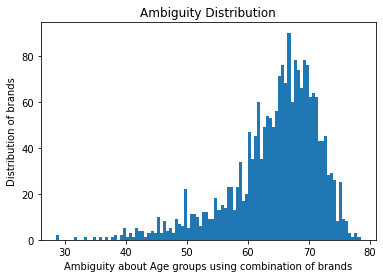

In [46]:
# `ambiguity_dict_age` is the sorted dictionary
x_values = list(ambiguity_dict_age.keys())
y_values = list(ambiguity_dict_age.values())

# Create a histogram with 10 bins
plt.hist(x_values, bins=100, weights=y_values)

# Add axis labels and a title
plt.xlabel('Ambiguity about Age groups using combination of brands')
plt.ylabel('Distribution of brands')
plt.title('Ambiguity Distribution')

# Show the plot
plt.show()